In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mne

In [2]:
os.chdir('C:/Users/dkornev/Desktop/Work Folder/My Folders/Harrisburg University/ISEM 780-52-A-2021 Fall - Doctoral Research Seminar/Experiment')
os.getcwd()

'C:\\Users\\dkornev\\Desktop\\Work Folder\\My Folders\\Harrisburg University\\ISEM 780-52-A-2021 Fall - Doctoral Research Seminar\\Experiment'

In [3]:
#####################################
#####################################
# Function creation
def IGT(a):
    a = a.TL02.str.split(r'\t', expand=True) # dividing by columns; !!!the whole dataset is more than 200 trials (201)!!!
    a.columns = ['Time', 'Time1', 'Mark'] # rename columns
    a.drop('Time1', axis = 1, inplace = True) # drop colunm "0"

    # Sort decision time points (DTP) only and dividing by 10 Blocks
    igt1 = a[(a.Mark == '"PP 1"') | (a.Mark == '"PP 2"') | (a.Mark == '"PP 3"') | (a.Mark == '"PP 4"')]
    igt1.columns = ['DTP', 'Deck']
    igt1 = igt1.reset_index(drop = True)
    igt1['Block'] = pd.DataFrame(np.repeat(np.arange(0, 10), 20))
    igt1 = igt1.dropna(axis=0, how='any') # erasing NaN rows

    # Sort reaction time points (RTP)
    # PP9 - win
    # PP10 - loss
    igt2 = a[(a.Mark == '"PP 9"') | (a.Mark == '"PP 10"')]
    igt2.columns = ['RTP', 'Result']
    igt2 = igt2.reset_index(drop = True)

    # The whole IGT dataset
    igt = igt1.join(igt2)
    igt = igt.fillna(method='ffill')

    # Rename decks and results
    igt['RTP'] = igt['RTP'].astype(str).astype(int)
    igt['DTP'] = igt['DTP'].astype(str).astype(int)
    igt.loc[(igt.Deck == '"PP 1"'), 'Deck'] = 'A'
    igt.loc[(igt.Deck == '"PP 2"'), 'Deck'] = 'B'
    igt.loc[(igt.Deck == '"PP 3"'), 'Deck'] = 'C' 
    igt.loc[(igt.Deck == '"PP 4"'), 'Deck'] = 'D'
    igt.loc[(igt.Result == '"PP 9"'), 'Result'] = '1' 
    igt.loc[(igt.Result == '"PP 10"'), 'Result'] = '0'
    
      # Dividing by IGT blocks
    igtBlock1 = igt[0:20]
    igtBlock2 = igt[20:40]
    igtBlock3 = igt[40:60]
    igtBlock4 = igt[60:80]
    igtBlock5 = igt[80:100]
    igtBlock6 = igt[100:120]
    igtBlock7 = igt[120:140]
    igtBlock8 = igt[140:160]
    igtBlock9 = igt[160:180]
    igtBlock10 = igt[180:200]

    # IGT Score calculation

    igtBlock1A = igtBlock1[(igtBlock1.Deck == 'A')]
    igtBlock1B = igtBlock1[(igtBlock1.Deck == 'B')]
    igtBlock1C = igtBlock1[(igtBlock1.Deck == 'C')]
    igtBlock1D = igtBlock1[(igtBlock1.Deck == 'D')]

    igtBlock2A = igtBlock2[(igtBlock2.Deck == 'A')]
    igtBlock2B = igtBlock2[(igtBlock2.Deck == 'B')]
    igtBlock2C = igtBlock2[(igtBlock2.Deck == 'C')]
    igtBlock2D = igtBlock2[(igtBlock2.Deck == 'D')]

    igtBlock3A = igtBlock3[(igtBlock3.Deck == 'A')]
    igtBlock3B = igtBlock3[(igtBlock3.Deck == 'B')]
    igtBlock3C = igtBlock3[(igtBlock3.Deck == 'C')]
    igtBlock3D = igtBlock3[(igtBlock3.Deck == 'D')]

    igtBlock4A = igtBlock4[(igtBlock4.Deck == 'A')]
    igtBlock4B = igtBlock4[(igtBlock4.Deck == 'B')]
    igtBlock4C = igtBlock4[(igtBlock4.Deck == 'C')]
    igtBlock4D = igtBlock4[(igtBlock4.Deck == 'D')]

    igtBlock5A = igtBlock5[(igtBlock5.Deck == 'A')]
    igtBlock5B = igtBlock5[(igtBlock5.Deck == 'B')]
    igtBlock5C = igtBlock5[(igtBlock5.Deck == 'C')]
    igtBlock5D = igtBlock5[(igtBlock5.Deck == 'D')]
    
    igtBlock6A = igtBlock6[(igtBlock6.Deck == 'A')]
    igtBlock6B = igtBlock6[(igtBlock6.Deck == 'B')]
    igtBlock6C = igtBlock6[(igtBlock6.Deck == 'C')]
    igtBlock6D = igtBlock6[(igtBlock6.Deck == 'D')]
    
    igtBlock7A = igtBlock7[(igtBlock7.Deck == 'A')]
    igtBlock7B = igtBlock7[(igtBlock7.Deck == 'B')]
    igtBlock7C = igtBlock7[(igtBlock7.Deck == 'C')]
    igtBlock7D = igtBlock7[(igtBlock7.Deck == 'D')]

    igtBlock8A = igtBlock8[(igtBlock8.Deck == 'A')]
    igtBlock8B = igtBlock8[(igtBlock8.Deck == 'B')]
    igtBlock8C = igtBlock8[(igtBlock8.Deck == 'C')]
    igtBlock8D = igtBlock8[(igtBlock8.Deck == 'D')]

    igtBlock9A = igtBlock9[(igtBlock9.Deck == 'A')]
    igtBlock9B = igtBlock9[(igtBlock9.Deck == 'B')]
    igtBlock9C = igtBlock9[(igtBlock9.Deck == 'C')]
    igtBlock9D = igtBlock9[(igtBlock9.Deck == 'D')]

    igtBlock10A = igtBlock10[(igtBlock10.Deck == 'A')]
    igtBlock10B = igtBlock10[(igtBlock10.Deck == 'B')]
    igtBlock10C = igtBlock10[(igtBlock10.Deck == 'C')]
    igtBlock10D = igtBlock10[(igtBlock10.Deck == 'D')]
    
    # IGTscore = sum(C) + sum(D) - sum(A) - sum(B) by blocks
    igtBlock1Score = igtBlock1C.shape[0] + igtBlock1D.shape[0] - igtBlock1A.shape[0] - igtBlock1B.shape[0]
    igtBlock2Score = igtBlock2C.shape[0] + igtBlock2D.shape[0] - igtBlock2A.shape[0] - igtBlock2B.shape[0]
    igtBlock3Score = igtBlock3C.shape[0] + igtBlock3D.shape[0] - igtBlock3A.shape[0] - igtBlock3B.shape[0]
    igtBlock4Score = igtBlock4C.shape[0] + igtBlock4D.shape[0] - igtBlock4A.shape[0] - igtBlock4B.shape[0]
    igtBlock5Score = igtBlock5C.shape[0] + igtBlock5D.shape[0] - igtBlock5A.shape[0] - igtBlock5B.shape[0]
    igtBlock6Score = igtBlock6C.shape[0] + igtBlock6D.shape[0] - igtBlock6A.shape[0] - igtBlock6B.shape[0]
    igtBlock7Score = igtBlock7C.shape[0] + igtBlock7D.shape[0] - igtBlock7A.shape[0] - igtBlock7B.shape[0]
    igtBlock8Score = igtBlock8C.shape[0] + igtBlock8D.shape[0] - igtBlock8A.shape[0] - igtBlock8B.shape[0]
    igtBlock9Score = igtBlock9C.shape[0] + igtBlock9D.shape[0] - igtBlock9A.shape[0] - igtBlock9B.shape[0]
    igtBlock10Score = igtBlock10C.shape[0] + igtBlock10D.shape[0] - igtBlock10A.shape[0] - igtBlock10B.shape[0]

    # Collect IGTscore in one row
    IGTScore = [igtBlock1Score, igtBlock2Score, igtBlock3Score, igtBlock4Score, igtBlock5Score, igtBlock6Score, igtBlock7Score, igtBlock8Score, igtBlock9Score, igtBlock10Score]
    IGTScore = pd.DataFrame(IGTScore)
    
    return IGTScore

In [4]:
#####################################
#####################################
# IGT function creation
def EVENTS(a):
    a = a.TL02.str.split(r'\t', expand=True) # dividing by columns; !!!the whole dataset is more than 200 trials (201)!!!
    a.columns = ['Time', 'Time1', 'Mark'] # rename columns
    a.drop('Time1', axis = 1, inplace = True) # drop colunm "0"

    # Sort decision time points (DTP) only and dividing by 10 Blocks
    igt1 = a[(a.Mark == '"PP 1"') | (a.Mark == '"PP 2"') | (a.Mark == '"PP 3"') | (a.Mark == '"PP 4"')]
    igt1.columns = ['DTP', 'Deck']
    igt1 = igt1.reset_index(drop = True)
    igt1['Block'] = pd.DataFrame(np.repeat(np.arange(0, 10), 20))
    
    # Sort reaction time points (RTP)
    # PP9 - win
    # PP10 - loss
    igt2 = a[(a.Mark == '"PP 9"') | (a.Mark == '"PP 10"')]
    igt2.columns = ['RTP', 'Result']
    igt2 = igt2.reset_index(drop = True)

    # The whole IGT dataset
    igt = igt1.join(igt2)
    igt = igt.dropna(axis=0, how='any') # erasing NaN rows
    igt = igt.drop_duplicates(keep='first', subset='RTP') # duplicates in rows deliting

    # Rename decks and results
    igt['RTP'] = igt['RTP'].astype(str).astype(int)
    igt['DTP'] = igt['DTP'].astype(str).astype(int)
    igt.loc[(igt.Deck == '"PP 1"'), 'Deck'] = 'A'
    igt.loc[(igt.Deck == '"PP 2"'), 'Deck'] = 'B'
    igt.loc[(igt.Deck == '"PP 3"'), 'Deck'] = 'C' 
    igt.loc[(igt.Deck == '"PP 4"'), 'Deck'] = 'D'
    igt.loc[(igt.Result == '"PP 9"'), 'Result'] = '1' 
    igt.loc[(igt.Result == '"PP 10"'), 'Result'] = '0'
    
    # Events (triggers) list creation
    igt['Tmax'] = igt['RTP'] + 800 # RTP is 0 point of trigger event, Tmax is the END point of the trigger event
    igt['Tmin'] = igt['RTP'] - 200 # RTP is 0 point of trigger event, Tmin is the START point of the trigger event
    events = igt[['Deck', 'Tmin', 'Tmax']]
    events = events.melt(id_vars=['Deck'], value_vars=['Tmin', 'Tmax'])
    events.drop('Deck', axis = 1, inplace = True)
    events.columns = ['point', 'time']
    events = events.sort_values(by=['time'])
    
    Tmin = events[(events.point == 'Tmin')]
    Tmax = events[(events.point == 'Tmax')]
    Tmax = Tmax.reset_index(drop = True)
    Tmin['index'] = pd.DataFrame(np.arange(1001, 2001))
    Tmax['index'] = pd.DataFrame(np.arange(2001, 3001))
    events = pd.concat([Tmin, Tmax])
    events = events.reset_index(drop = True)
    events = events.sort_values(by=['time'])   
    # For following synchronization with EEG dataset EVENTS data should be adjusted by adding an appropriate columns
    
    # Set of triggers events (time window intervals) creation: 200 card selections by 1001 time points, total 200200 rows     
    intervals = pd.concat([pd.DataFrame([i], columns=['point']) for i in range(1001)]*200, ignore_index=True)
    intervals.loc[intervals.point == 0, 'point'] = '01Tmin'
    intervals.loc[intervals.point == 1000, 'point'] = '02Tmax'
    intervals['int'] = pd.DataFrame(np.arange(0, 200200)) 
    
    # Rename Tmin and Tmax points for following sorting
    intervals['point'] = intervals['point'].astype(str)
    
    # now we have the first 200 rows of Tmin (01Tmin) and the second 200 rows of Tmax (02Tmax) 
    # for following numbering simplification
    intervals = intervals.sort_values(by=['point', 'int'])
    intervals = intervals.reset_index(drop = True)
    
    # Adding new column "index" for numbering Tmin and Tmax
    A = [np.arange(1001, 1201)]
    B = [np.arange(2001, 2201)]
    AA = pd.DataFrame(A).T
    BB = pd.DataFrame(B).T
    C = pd.concat([AA, BB])
    C = C.reset_index(drop = True)
    intervals = intervals.join(C)
    intervals.columns = ['point', 'int', 'index']
    intervals = intervals.fillna(0)
    # Now we have individual indexes for each Tmin and Tmax
    
    # Sort back to 1 - 200200 by "int" column
    intervals = intervals.sort_values(by=['int'])
    intervals['index'] = intervals['index'].astype(int)
    
    # Rename points back
    intervals.loc[(intervals.point == '01Tmin'), 'point'] = 'Tmin' 
    intervals.loc[(intervals.point == '02Tmax'), 'point'] = 'Tmax'
    
     # Creation trigger events dataset
    
    events_triggers = intervals.merge(events, how = 'left', on = 'index') # merge EVENTS and INTERVALS
    
    events_triggers = events_triggers.reset_index(drop = True)
    events_triggers = events_triggers[['point_x', 'time']] # taking just two columns
    events_triggers.columns = ['intervals', 'time'] # renaming columns to "INTARVALS" and "TIME"

    events_triggers['time3'] = events_triggers['time']
    events_triggers['time3'].fillna(method='bfill', inplace=True) # filling NaN as the lower  number

    events_triggers = events_triggers.dropna(subset=['time3'])# drop NaN by the column

    events_triggers['time4'] = events_triggers['time']

    events_triggers = events_triggers.fillna(method='ffill') # filling NaN as the upper number

    events_triggers['intervals2'] = events_triggers['intervals']
    events_triggers.loc[(events_triggers.intervals2 == 'Tmin'), 'intervals2'] = '0' 
    events_triggers.loc[(events_triggers.intervals2 == 'Tmax'), 'intervals2'] = '0' 
    events_triggers['intervals2'] = events_triggers['intervals2'].astype(int)

    events_triggers['time5'] = events_triggers['time4'] + events_triggers['intervals2']
    events_triggers = events_triggers[['intervals', 'time5']]
    events_triggers.columns = ['intervals', 'time']
 
    return events_triggers

In [5]:
#####################################
#####################################
# EEG function creation
def EEG(a, b):                   
    # EEG dataset creation with MEAN values by all columns. Filtering: low-pass 1Hz, High-pass 50Hz
    raw_df = a.to_data_frame()

    sfreq = a.info['sfreq'] # frequency setting: 1000Hz
    a.load_data()

    # Filtering: low-pass 1Hz, High-pass 50Hz
    raw_f = a.filter(1., 50., fir_design='firwin', skip_by_annotation='edge')
    raw_df_f = raw_f.to_data_frame()
    raw_df_f.drop('time', axis = 1, inplace = True)
                         
    mask = ((raw_df <= 50) & (raw_df >= -50))
    raw_df_f = raw_df_f[mask]
    raw_df_f = raw_df_f.fillna(method='ffill')
    raw_df_f = raw_df_f.fillna(method='bfill')
                         
                         
    # Signal averaging
    raw_df_f['level'] = raw_df_f.mean(axis=1)
    raw_df_f_mean = raw_df_f['level']
    raw_df_f_mean = raw_df_f_mean.to_frame()
    raw_df_f_mean['time'] = raw_df_f_mean.index
    raw_df_f_mean

    # The whole dataset creation connecting trigger events with eeg levels by time points
    S = raw_df_f_mean.join(b.set_index('time'), on='time')
    S = S.dropna(axis=0, how='any') # erasing NaN rows
    S = S.reset_index(drop = True)
    # preparing dataset for following PIVOT function application
    # adding 'EPOCHS' column that reflects 200 epochs (each for each card choice) with 1001 time points
    S['epochs'] = pd.DataFrame(np.repeat(np.arange(0, 200), 1001))
    S.loc[(S.intervals == 'Tmin'), 'intervals'] = '0' 
    S.loc[(S.intervals == 'Tmax'), 'intervals'] = '1000' 
    S['intervals'] = S['intervals'].astype(int)

    # Dataset transformation, matching (Tmin, -199, -198, ..., -1, RTP(0), 1, 2,3, ....., 788, 789, Tmax) points
    S = S.pivot(index='epochs', columns='intervals', values='level')

    # Mean value by each time point
    dataset = S.mean()
    dataset = dataset.to_frame()
    dataset['Time'] = pd.DataFrame(np.arange(-200, 1000))
    dataset = dataset.reset_index(drop = True)
    dataset.columns = ['Level', 'Time']
    
    return dataset

In [22]:
#####################################
#####################################
# EEG function creation; raw data befor filtering
def EEG_raw(a, b):
    # EEG dataset creation with MEAN values by all columns. Filtering: low-pass 1Hz, High-pass 50Hz
    raw_df = a.to_data_frame()

    # Signal averaging
    raw_df['level'] = raw_df.mean(axis=1)
    raw_df_mean = raw_df['level']
    raw_df_mean = raw_df_mean.to_frame()
    raw_df_mean['time'] = raw_df_mean.index
    raw_df_mean

    # The whole dataset creation connecting trigger events with eeg levels by time points
    S = raw_df_mean.join(b.set_index('time'), on='time')
    S = S.dropna(axis=0, how='any') # erasing NaN rows
    S = S.reset_index(drop = True)
    # preparing dataset for following PIVOT function application
    # adding 'EPOCHS' column that reflects 200 epochs (each for each card choice) with 1001 time points
    S['epochs'] = pd.DataFrame(np.repeat(np.arange(0, 200), 1001))
    S.loc[(S.intervals == 'Tmin'), 'intervals'] = '0' 
    S.loc[(S.intervals == 'Tmax'), 'intervals'] = '1000' 
    S['intervals'] = S['intervals'].astype(int)

    # Dataset transformation, matching (Tmin, -199, -198, ..., -1, RTP(0), 1, 2,3, ....., 788, 789, Tmax) points
    S = S.pivot(index='epochs', columns='intervals', values='level')

    # Mean value by each time point
    dataset = S.mean()
    dataset = dataset.to_frame()
    dataset['Time'] = pd.DataFrame(np.arange(-200, 1000))
    dataset = dataset.reset_index(drop = True)
    dataset.columns = ['Level', 'Time']
    
    return dataset

In [23]:
igt01 = pd.read_csv('S1.edf.mrk')
igt02 = pd.read_csv('S2_3.edf.mrk')
igt04 = pd.read_csv('S4.edf.mrk')
igt05 = pd.read_csv('S5.edf.mrk')
igt06 = pd.read_csv('S6.edf.mrk')
igt07 = pd.read_csv('S7.edf.mrk')
igt08 = pd.read_csv('S8.edf.mrk')
igt09 = pd.read_csv('S9.edf.mrk')
igt10 = pd.read_csv('S10.edf.mrk')
igt11 = pd.read_csv('S11.edf.mrk')
igt12 = pd.read_csv('S12.edf.mrk')
igt13 = pd.read_csv('S13.edf.mrk')
igt14 = pd.read_csv('S14.edf.mrk')
igt15 = pd.read_csv('S15.edf.mrk')
igt16 = pd.read_csv('S16.edf.mrk')
igt17 = pd.read_csv('S17.edf.mrk')
igt18 = pd.read_csv('S18.edf.mrk')
igt19 = pd.read_csv('S19.edf.mrk')
igt20 = pd.read_csv('S20.edf.mrk')
igt21 = pd.read_csv('S21.edf.mrk')

In [24]:
file01 = './S1.edf'
file02 = './S2.edf'
file04 = './S4.edf'
file05 = './S5.edf'
file06 = './S6.edf'
file07 = './S7.edf'
file08 = './S8.edf'
file09 = './S9.edf'
file10 = './S10.edf'
file11 = './S11.edf'
file12 = './S12.edf'
file13 = './S13.edf'
file14 = './S14.edf'
file15 = './S15.edf'
file16 = './S16.edf'
file17 = './S17.edf'
file18 = './S18.edf'
file19 = './S19.edf'
file20 = './S20.edf'
file21 = './S21.edf'

In [25]:
eeg01 = mne.io.read_raw_edf(file01)
eeg02 = mne.io.read_raw_edf(file02)
eeg04 = mne.io.read_raw_edf(file04)
eeg05 = mne.io.read_raw_edf(file05)
eeg06 = mne.io.read_raw_edf(file06)
eeg07 = mne.io.read_raw_edf(file07)
eeg08 = mne.io.read_raw_edf(file08)
eeg09 = mne.io.read_raw_edf(file09)
eeg10 = mne.io.read_raw_edf(file10)
eeg11 = mne.io.read_raw_edf(file11)
eeg12 = mne.io.read_raw_edf(file12)
eeg13 = mne.io.read_raw_edf(file13)
eeg14 = mne.io.read_raw_edf(file14)
eeg15 = mne.io.read_raw_edf(file15)
eeg16 = mne.io.read_raw_edf(file16)
eeg17 = mne.io.read_raw_edf(file17)
eeg18 = mne.io.read_raw_edf(file18)
eeg19 = mne.io.read_raw_edf(file19)
eeg20 = mne.io.read_raw_edf(file20)
eeg21 = mne.io.read_raw_edf(file21)

Extracting EDF parameters from C:\Users\dkornev\Desktop\Work Folder\My Folders\Harrisburg University\ISEM 780-52-A-2021 Fall - Doctoral Research Seminar\Experiment\S1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from C:\Users\dkornev\Desktop\Work Folder\My Folders\Harrisburg University\ISEM 780-52-A-2021 Fall - Doctoral Research Seminar\Experiment\S2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from C:\Users\dkornev\Desktop\Work Folder\My Folders\Harrisburg University\ISEM 780-52-A-2021 Fall - Doctoral Research Seminar\Experiment\S4.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from C:\Users\dkornev\Desktop\Work Folder\My Folders\Harrisburg University\ISEM 780-52-A-2021 Fall - Doctoral Research Seminar\Experiment\S5.edf...
EDF file detected
Setting channel info structure...
Cre

In [26]:
IGTScore01 = IGT(igt01)
IGTScore02 = IGT(igt02)
IGTScore04 = IGT(igt04)
IGTScore05 = IGT(igt05)
IGTScore06 = IGT(igt06)
IGTScore07 = IGT(igt07)
IGTScore08 = IGT(igt08)
IGTScore09 = IGT(igt09)
IGTScore10 = IGT(igt10)
IGTScore11 = IGT(igt11)
IGTScore12 = IGT(igt12)
IGTScore13 = IGT(igt13)
IGTScore14 = IGT(igt14)
IGTScore15 = IGT(igt15)
IGTScore16 = IGT(igt16)
IGTScore17 = IGT(igt17)
IGTScore18 = IGT(igt18)
IGTScore19 = IGT(igt19)
IGTScore20 = IGT(igt20)
IGTScore21 = IGT(igt21)

In [11]:
IGTScoreTotal = pd.concat([IGTScore01, 
                           IGTScore02, 
                           IGTScore04, 
                           IGTScore05,
                           IGTScore06, 
                           IGTScore07, 
                           IGTScore08, 
                           IGTScore09,
                           IGTScore10, 
                           IGTScore11, 
                           IGTScore12, 
                           IGTScore13,
                           IGTScore14, 
                           IGTScore15, 
                           IGTScore16, 
                           IGTScore17,
                           IGTScore18, 
                           IGTScore19, 
                           IGTScore20, 
                           IGTScore21], axis=1)

IGTScoreTotal_T = IGTScoreTotal.T
IGTScoreTotal_T.columns = ('1','2','3','4','5','6','7','8','9','10')
IGTScoreTotal_T_i = IGTScoreTotal_T.reset_index(drop = True)

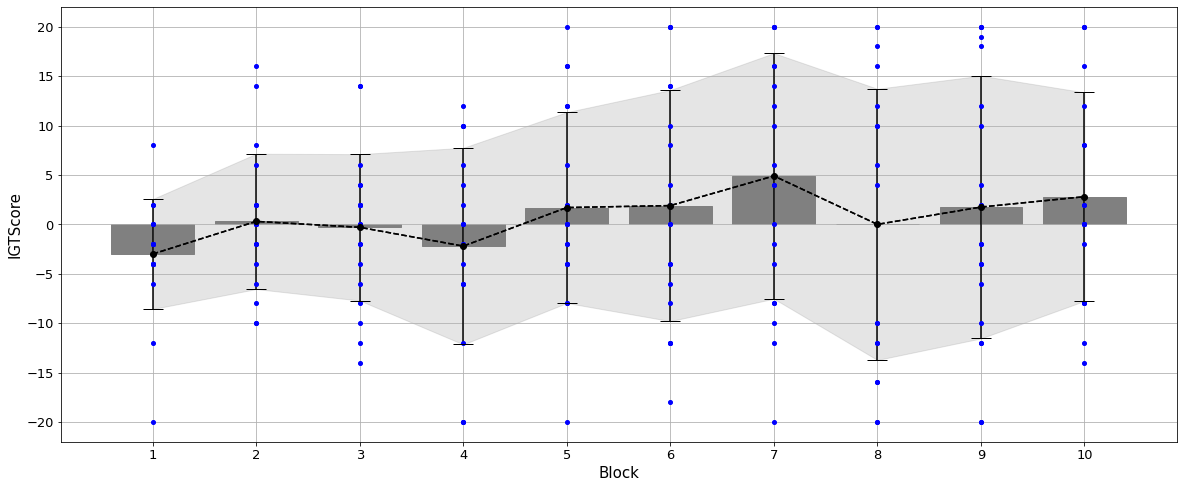

In [12]:
plt.figure(figsize=(20, 8))

# Scatterplot
plt.plot(np.arange(0, 10), 
         IGTScoreTotal, 
         'o', 
         markersize=4, 
         c="blue")
# Calculate the average
plt.plot(IGTScoreTotal_T_i.mean(axis=0), 
         marker='o', 
         color='black',
         linestyle='dashed')

plt.bar(np.arange(0, 10), 
        IGTScoreTotal_T_i.mean(axis=0), 
        edgecolor='gray', 
        linewidth=1, 
        facecolor = 'gray')

# Calculate the standard deviation
plt.errorbar(np.arange(0, 10), 
             IGTScoreTotal_T_i.mean(axis=0), 
             yerr=IGTScoreTotal_T_i.std(axis=0),
             capsize=10, 
             color='black',
             linestyle='dashed')

plt.fill_between(np.arange(0, 10),
               (IGTScoreTotal_T_i.mean(axis=0) + IGTScoreTotal_T_i.std(axis=0)),
               IGTScoreTotal_T_i.mean(axis=0) - IGTScoreTotal_T_i.std(axis=0),
               color='gray', 
               alpha=0.2)

plt.xlabel('Block', size='15')
plt.ylabel('IGTScore', size='15')
plt.yticks(fontsize=13)
plt.xticks(fontsize=13)
plt.grid()
plt.savefig('IGTScoreTotal__.png')
plt.show()

In [13]:
mask_H = IGTScoreTotal_T_i.sum(axis=1) >= 10
mask_A = IGTScoreTotal_T_i.sum(axis=1) < 10

IGTScore_H = IGTScoreTotal_T_i[mask_H]
IGTScore_A = IGTScoreTotal_T_i[mask_A]

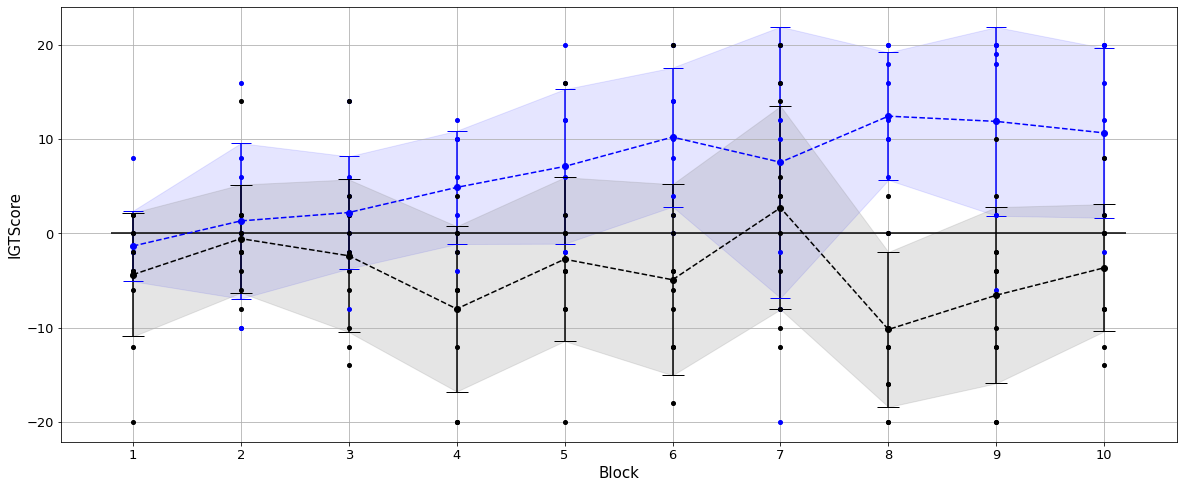

In [14]:
plt.figure(figsize=(20, 8))
plt.xticks(range(1, 11))

# Scatterplot
plt.plot(np.arange(1, 11), 
         IGTScore_H.T, 
         'o', 
         markersize=4, 
         c="blue")

plt.plot(np.arange(1, 11), 
         IGTScore_A.T, 
         'o', 
         markersize=4, 
         c="black")

# Define error bar, mean, and std
plt.errorbar(np.arange(1, 11), 
             IGTScore_H.mean(axis=0), 
             yerr=IGTScore_H.std(axis=0),
             capsize=10, 
             fmt='o',
             color='blue',
             linestyle='dashed')

plt.errorbar(np.arange(1, 11), 
             IGTScore_A.mean(axis=0), 
             yerr=IGTScore_A.std(axis=0),
             capsize=11, 
             fmt='o',
             color='black',
             linestyle='dashed')

plt.fill_between(np.arange(1, 11),
               (IGTScore_H.mean(axis=0) + IGTScore_H.std(axis=0)),
                IGTScore_H.mean(axis=0) - IGTScore_H.std(axis=0),
                color='blue', 
                alpha=0.1)

plt.fill_between(np.arange(1, 11),
                (IGTScore_A.mean(axis=0) + IGTScore_A.std(axis=0)),
                 IGTScore_A.mean(axis=0) - IGTScore_A.std(axis=0),
                 color='gray', 
                 alpha=0.2)

plt.hlines(0, 0.8, 10.2, colors='black', linestyles='solid')
plt.xlabel('Block', size='15')
plt.ylabel('IGTScore', size='15')
plt.yticks(fontsize=13)
plt.xticks(fontsize=13)
plt.grid()

plt.savefig('IGT__.png')
plt.show()

In [15]:
IGTScoreTotal_T_i_sum = IGTScoreTotal_T_i
IGTScoreTotal_T_i_sum['sum'] = IGTScoreTotal_T_i_sum.sum(axis=1)

IGTScoreTotal_T_i_sum.loc[IGTScoreTotal_T_i_sum['sum'] < 10, 'index'] = '0'
IGTScoreTotal_T_i_sum.loc[IGTScoreTotal_T_i_sum['sum'] >= 10, 'index'] = '1'

Index = pd.DataFrame(IGTScoreTotal_T_i_sum['index'])

In [16]:
Events01 = EVENTS(igt01)
Events02 = EVENTS(igt02)
Events04 = EVENTS(igt04)
Events05 = EVENTS(igt05)
Events06 = EVENTS(igt06)
Events07 = EVENTS(igt07)
Events08 = EVENTS(igt08)
Events09 = EVENTS(igt09)
Events10 = EVENTS(igt10)
Events11 = EVENTS(igt11)
Events12 = EVENTS(igt12)
Events13 = EVENTS(igt13)
Events14 = EVENTS(igt14)
Events15 = EVENTS(igt15)
Events16 = EVENTS(igt16)
Events17 = EVENTS(igt17)
Events18 = EVENTS(igt18)
Events19 = EVENTS(igt19)
Events20 = EVENTS(igt20)
Events21 = EVENTS(igt21)

<ipython-input-4-c016c8036428>:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Tmin['index'] = pd.DataFrame(np.arange(1001, 2001))
<ipython-input-4-c016c8036428>:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Tmin['index'] = pd.DataFrame(np.arange(1001, 2001))
<ipython-input-4-c016c8036428>:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.or

In [17]:
EEG01 = EEG(eeg01, Events01)
EEG02 = EEG(eeg02, Events02)
EEG04 = EEG(eeg04, Events04)
EEG05 = EEG(eeg05, Events05)
EEG06 = EEG(eeg06, Events06)
EEG07 = EEG(eeg07, Events07)
EEG08 = EEG(eeg08, Events08)
EEG09 = EEG(eeg09, Events09)
EEG10 = EEG(eeg10, Events10)
EEG11 = EEG(eeg11, Events11)
EEG12 = EEG(eeg12, Events12)
EEG13 = EEG(eeg13, Events13)
EEG14 = EEG(eeg14, Events14)
EEG15 = EEG(eeg15, Events15)
EEG16 = EEG(eeg16, Events16)
EEG17 = EEG(eeg17, Events17)
EEG18 = EEG(eeg18, Events18)
EEG19 = EEG(eeg19, Events19)


Reading 0 ... 1843999  =      0.000 ...  1843.999 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 3301 samples (3.301 sec)

Reading 0 ... 2357999  =      0.000 ...  2357.999 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Low

In [27]:
EEG20 = EEG(eeg20, Events20)
EEG21 = EEG(eeg21, Events21)

Reading 0 ... 2095999  =      0.000 ...  2095.999 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 3301 samples (3.301 sec)

Reading 0 ... 2218999  =      0.000 ...  2218.999 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Low

In [28]:
EEGTotal = pd.concat([EEG01,
                      EEG02, 
                      EEG04, 
                      EEG05, 
                      EEG06, 
                      EEG07, 
                      EEG08, 
                      EEG09,
                      EEG10,
                      EEG11, 
                      EEG12, 
                      EEG13,
                      EEG14,
                      EEG15,
                      EEG16,
                      EEG17,
                      EEG18,
                      EEG19,
                      EEG20,
                      EEG21], axis=1)
EEGTotal = EEGTotal.drop(['Time'], axis=1)
EEGTotal_mean = EEGTotal.mean(axis=1)
EEGTotal_mean = EEGTotal_mean.to_frame()
EEGTotal_mean['Time'] = pd.DataFrame(np.arange(-200, 801))
EEGTotal_mean.columns = ['Level', 'Time']

In [29]:
EEGTotal_mean

,Level,Time
0,0.095690,-200
1,0.165660,-199
2,0.293910,-198
3,0.415987,-197
4,0.527790,-196
...,...,...
996,0.040072,796
997,0.084718,797
998,0.033624,798
999,0.008778,799


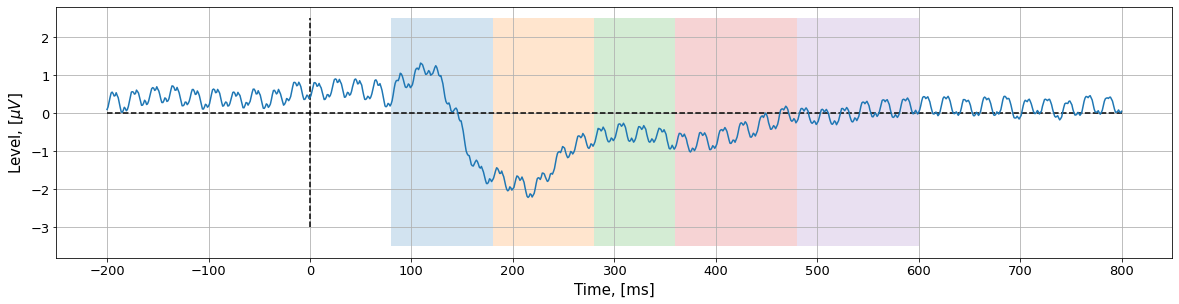

In [30]:
plt.figure(figsize=(20, 110))
plt.subplot(20,1,14)
plt.plot(EEGTotal_mean['Time'], EEGTotal_mean['Level'])
plt.hlines(0, -200, 800, colors='black', linestyles='dashed')
plt.vlines(0, -3, 2.5, colors='black', linestyles='dashed')
plt.grid()
plt.xlabel('Time, [ms]', size='15')
plt.ylabel('Level, [$\mu V$]', size='15')
y = np.arange(-3.5, 3)
plt.fill_betweenx(y,  80, 180, alpha=0.2)
plt.fill_betweenx(y, 180, 280, alpha=0.2)
plt.fill_betweenx(y, 280, 360, alpha=0.2)
plt.fill_betweenx(y, 360, 480, alpha=0.2)
plt.fill_betweenx(y, 480, 600, alpha=0.2)
plt.yticks(fontsize=13)
plt.xticks(np.arange(-200, 801, step=100), fontsize=13)

plt.savefig('EEGTotal_mean.png')
plt.show()

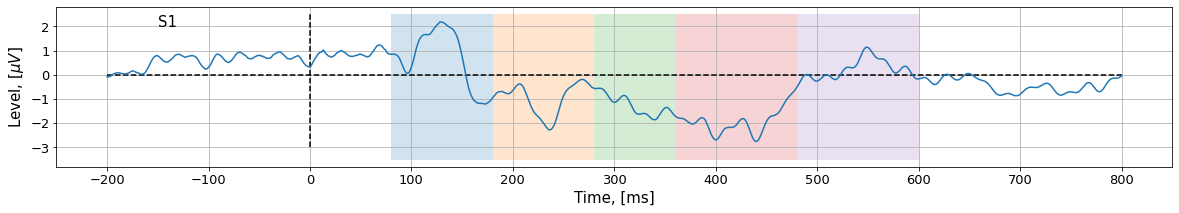

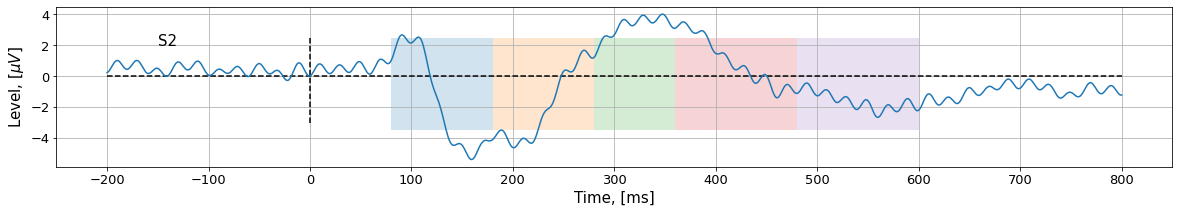

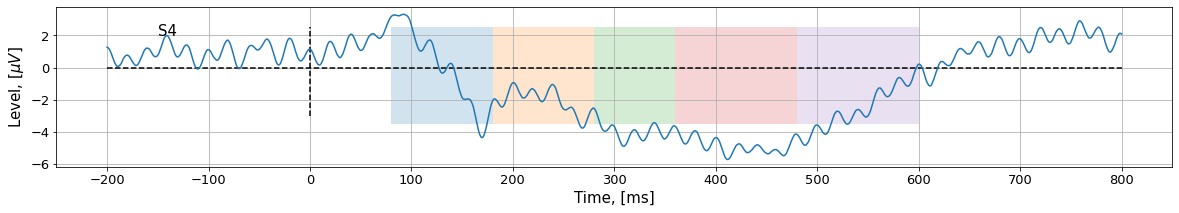

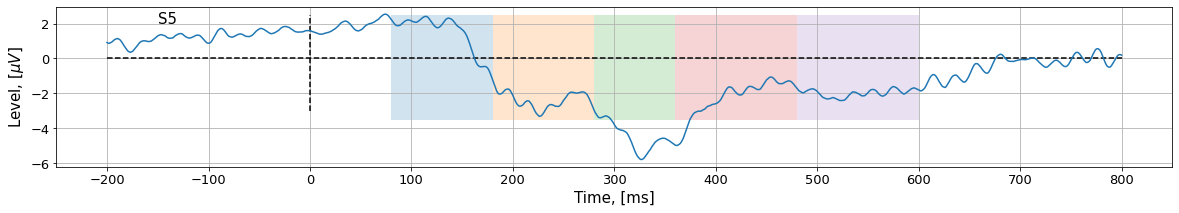

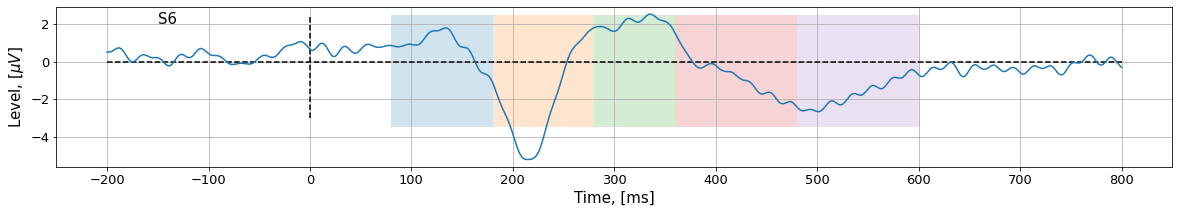

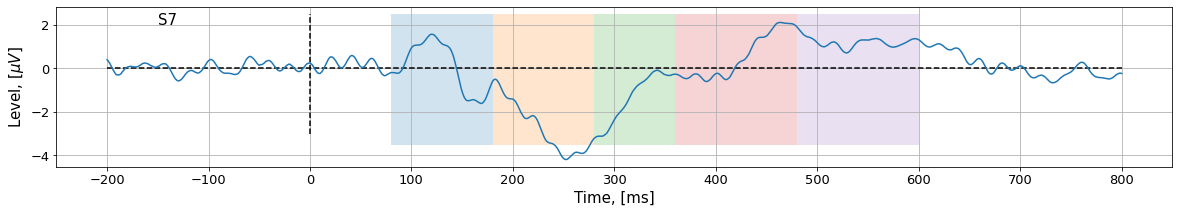

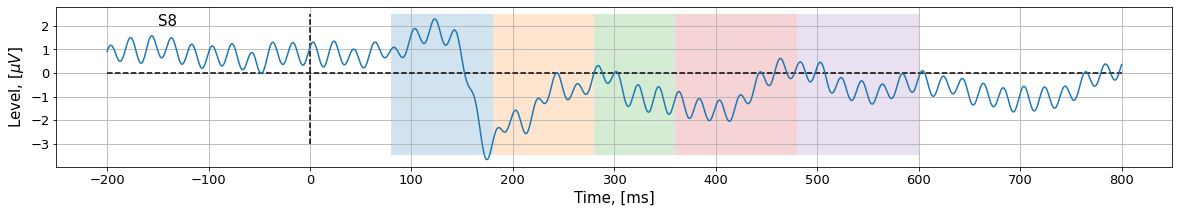

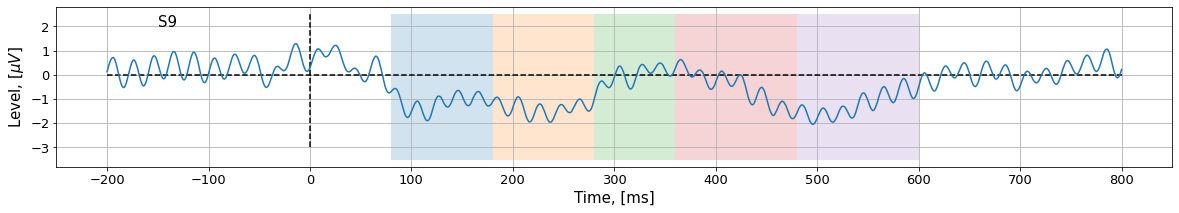

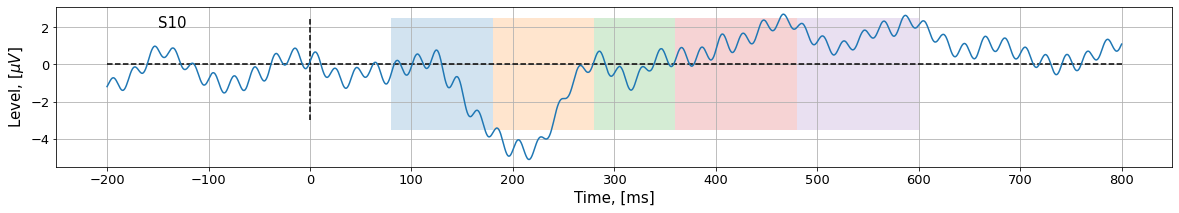

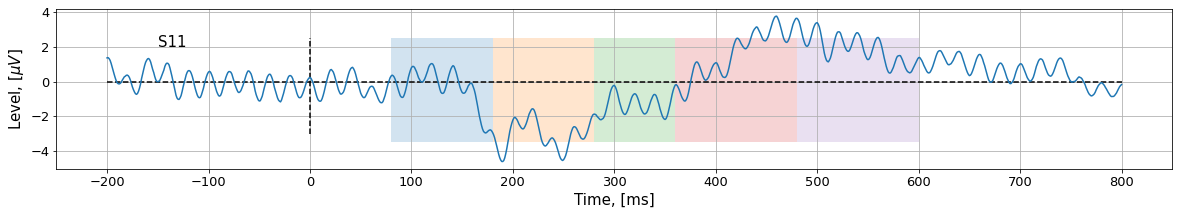

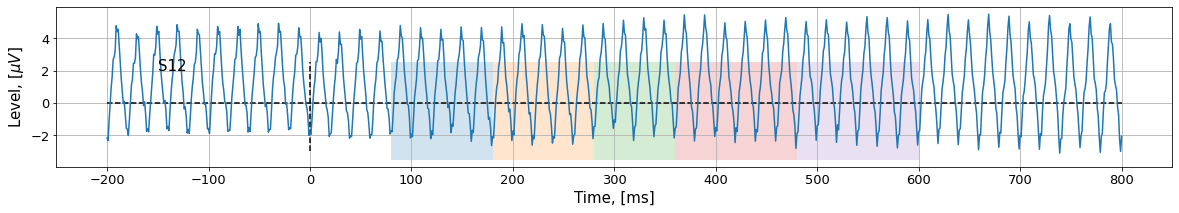

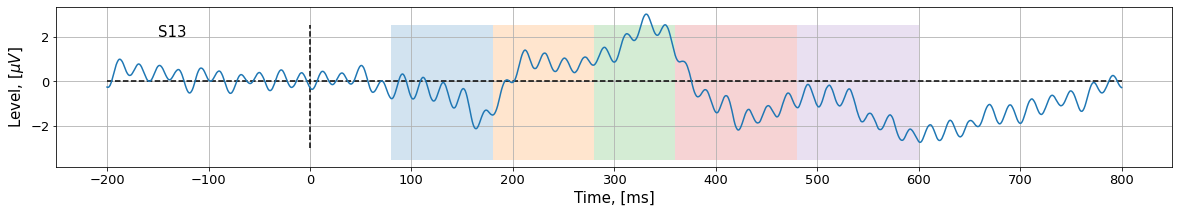

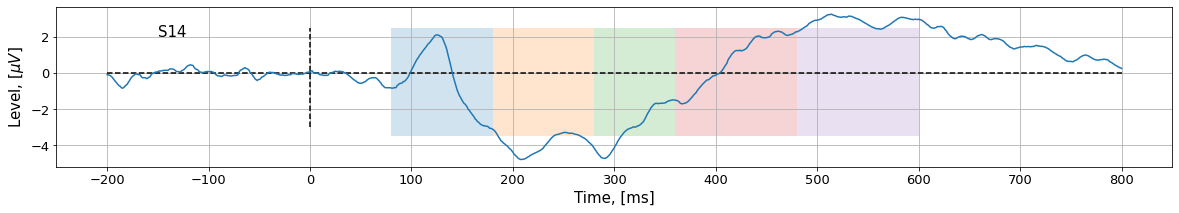

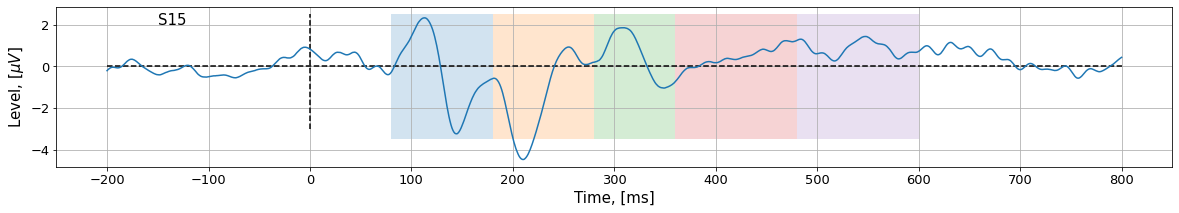

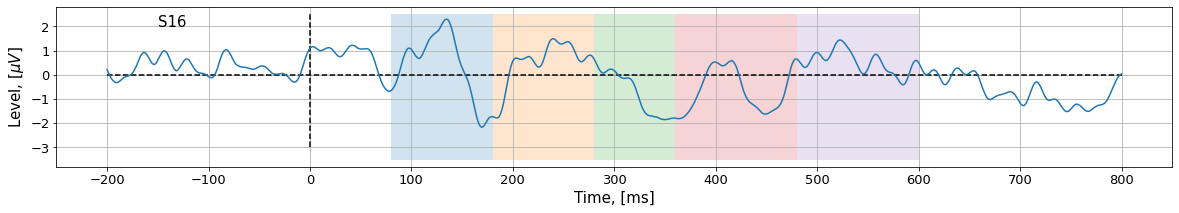

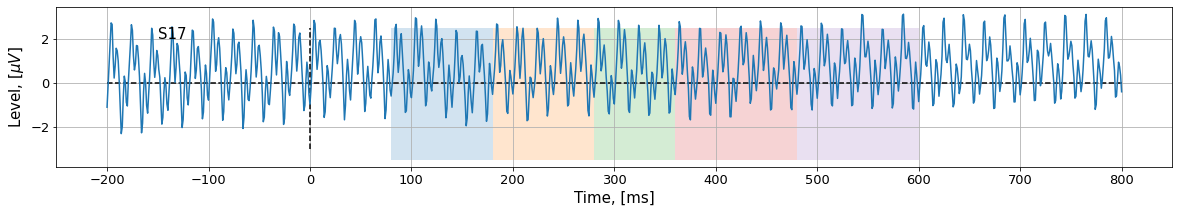

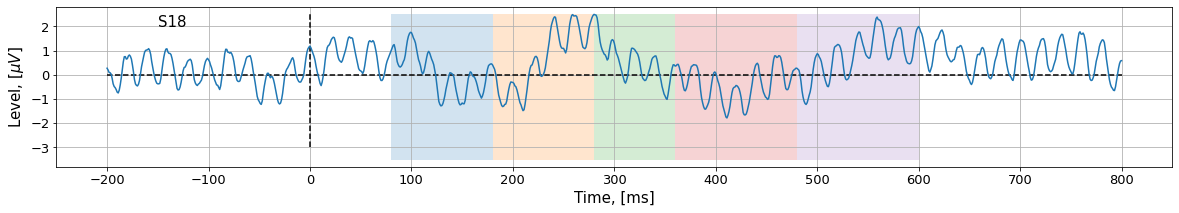

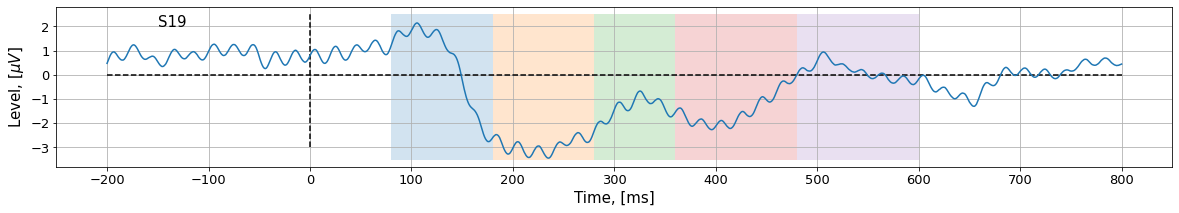

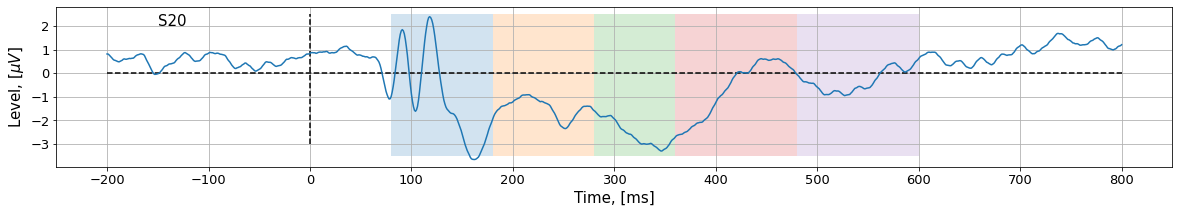

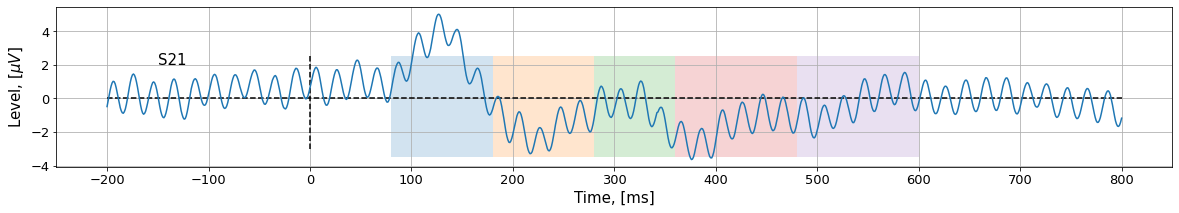

In [31]:
plt.figure(figsize=(20, 70))
plt.subplot(20,1,1)
plt.plot(EEG01['Time'], EEG01['Level'])
plt.hlines(0, -200, 800, colors='black', linestyles='dashed')
plt.vlines(0, -3, 2.5, colors='black', linestyles='dashed')
plt.grid()
plt.xlabel('Time, [ms]', size='15')
plt.ylabel('Level, [$\mu V$]', size='15')
y = np.arange(-3.5, 3)
plt.fill_betweenx(y,  80, 180, alpha=0.2)
plt.fill_betweenx(y, 180, 280, alpha=0.2)
plt.fill_betweenx(y, 280, 360, alpha=0.2)
plt.fill_betweenx(y, 360, 480, alpha=0.2)
plt.fill_betweenx(y, 480, 600, alpha=0.2)
plt.yticks(fontsize=13)
plt.xticks(np.arange(-200, 801, step=100), fontsize=13)
plt.text(-150, 2, 'S1', size='15')

plt.figure(figsize=(20, 70))
plt.subplot(20,1,2)
plt.plot(EEG02['Time'], EEG02['Level'])
plt.hlines(0, -200, 800, colors='black', linestyles='dashed')
plt.vlines(0, -3, 2.5, colors='black', linestyles='dashed')
plt.grid()
plt.xlabel('Time, [ms]', size='15')
plt.ylabel('Level, [$\mu V$]', size='15')
y = np.arange(-3.5, 3)
plt.fill_betweenx(y,  80, 180, alpha=0.2)
plt.fill_betweenx(y, 180, 280, alpha=0.2)
plt.fill_betweenx(y, 280, 360, alpha=0.2)
plt.fill_betweenx(y, 360, 480, alpha=0.2)
plt.fill_betweenx(y, 480, 600, alpha=0.2)
plt.yticks(fontsize=13)
plt.xticks(np.arange(-200, 801, step=100), fontsize=13)
plt.text(-150, 2, 'S2', size='15')

plt.figure(figsize=(20, 70))
plt.subplot(20,1,3)
plt.plot(EEG04['Time'], EEG04['Level'])
plt.hlines(0, -200, 800, colors='black', linestyles='dashed')
plt.vlines(0, -3, 2.5, colors='black', linestyles='dashed')
plt.grid()
plt.xlabel('Time, [ms]', size='15')
plt.ylabel('Level, [$\mu V$]', size='15')
y = np.arange(-3.5, 3)
plt.fill_betweenx(y,  80, 180, alpha=0.2)
plt.fill_betweenx(y, 180, 280, alpha=0.2)
plt.fill_betweenx(y, 280, 360, alpha=0.2)
plt.fill_betweenx(y, 360, 480, alpha=0.2)
plt.fill_betweenx(y, 480, 600, alpha=0.2)
plt.yticks(fontsize=13)
plt.xticks(np.arange(-200, 801, step=100), fontsize=13)
plt.text(-150, 2, 'S4', size='15')

plt.figure(figsize=(20, 70))
plt.subplot(20,1,4)
plt.plot(EEG05['Time'], EEG05['Level'])
plt.hlines(0, -200, 800, colors='black', linestyles='dashed')
plt.vlines(0, -3, 2.5, colors='black', linestyles='dashed')
plt.grid()
plt.xlabel('Time, [ms]', size='15')
plt.ylabel('Level, [$\mu V$]', size='15')
y = np.arange(-3.5, 3)
plt.fill_betweenx(y,  80, 180, alpha=0.2)
plt.fill_betweenx(y, 180, 280, alpha=0.2)
plt.fill_betweenx(y, 280, 360, alpha=0.2)
plt.fill_betweenx(y, 360, 480, alpha=0.2)
plt.fill_betweenx(y, 480, 600, alpha=0.2)
plt.yticks(fontsize=13)
plt.xticks(np.arange(-200, 801, step=100), fontsize=13)
plt.text(-150, 2, 'S5', size='15')

plt.figure(figsize=(20, 70))
plt.subplot(20,1,5)
plt.plot(EEG06['Time'], EEG06['Level'])
plt.hlines(0, -200, 800, colors='black', linestyles='dashed')
plt.vlines(0, -3, 2.5, colors='black', linestyles='dashed')
plt.grid()
plt.xlabel('Time, [ms]', size='15')
plt.ylabel('Level, [$\mu V$]', size='15')
y = np.arange(-3.5, 3)
plt.fill_betweenx(y,  80, 180, alpha=0.2)
plt.fill_betweenx(y, 180, 280, alpha=0.2)
plt.fill_betweenx(y, 280, 360, alpha=0.2)
plt.fill_betweenx(y, 360, 480, alpha=0.2)
plt.fill_betweenx(y, 480, 600, alpha=0.2)
plt.yticks(fontsize=13)
plt.xticks(np.arange(-200, 801, step=100), fontsize=13)
plt.text(-150, 2, 'S6', size='15')

plt.figure(figsize=(20, 70))
plt.subplot(20,1,6)
plt.plot(EEG07['Time'], EEG07['Level'])
plt.hlines(0, -200, 800, colors='black', linestyles='dashed')
plt.vlines(0, -3, 2.5, colors='black', linestyles='dashed')
plt.grid()
plt.xlabel('Time, [ms]', size='15')
plt.ylabel('Level, [$\mu V$]', size='15')
y = np.arange(-3.5, 3)
plt.fill_betweenx(y,  80, 180, alpha=0.2)
plt.fill_betweenx(y, 180, 280, alpha=0.2)
plt.fill_betweenx(y, 280, 360, alpha=0.2)
plt.fill_betweenx(y, 360, 480, alpha=0.2)
plt.fill_betweenx(y, 480, 600, alpha=0.2)
plt.yticks(fontsize=13)
plt.xticks(np.arange(-200, 801, step=100), fontsize=13)
plt.text(-150, 2, 'S7', size='15')

plt.figure(figsize=(20, 70))
plt.subplot(20,1,7)
plt.plot(EEG08['Time'], EEG08['Level'])
plt.hlines(0, -200, 800, colors='black', linestyles='dashed')
plt.vlines(0, -3, 2.5, colors='black', linestyles='dashed')
plt.grid()
plt.xlabel('Time, [ms]', size='15')
plt.ylabel('Level, [$\mu V$]', size='15')
y = np.arange(-3.5, 3)
plt.fill_betweenx(y,  80, 180, alpha=0.2)
plt.fill_betweenx(y, 180, 280, alpha=0.2)
plt.fill_betweenx(y, 280, 360, alpha=0.2)
plt.fill_betweenx(y, 360, 480, alpha=0.2)
plt.fill_betweenx(y, 480, 600, alpha=0.2)
plt.yticks(fontsize=13)
plt.xticks(np.arange(-200, 801, step=100), fontsize=13)
plt.text(-150, 2, 'S8', size='15')

plt.figure(figsize=(20, 70))
plt.subplot(20,1,8)
plt.plot(EEG09['Time'], EEG09['Level'])
plt.hlines(0, -200, 800, colors='black', linestyles='dashed')
plt.vlines(0, -3, 2.5, colors='black', linestyles='dashed')
plt.grid()
plt.xlabel('Time, [ms]', size='15')
plt.ylabel('Level, [$\mu V$]', size='15')
y = np.arange(-3.5, 3)
plt.fill_betweenx(y,  80, 180, alpha=0.2)
plt.fill_betweenx(y, 180, 280, alpha=0.2)
plt.fill_betweenx(y, 280, 360, alpha=0.2)
plt.fill_betweenx(y, 360, 480, alpha=0.2)
plt.fill_betweenx(y, 480, 600, alpha=0.2)
plt.yticks(fontsize=13)
plt.xticks(np.arange(-200, 801, step=100), fontsize=13)
plt.text(-150, 2, 'S9', size='15')

plt.figure(figsize=(20, 70))
plt.subplot(20,1,9)
plt.plot(EEG10['Time'], EEG10['Level'])
plt.hlines(0, -200, 800, colors='black', linestyles='dashed')
plt.vlines(0, -3, 2.5, colors='black', linestyles='dashed')
plt.grid()
plt.xlabel('Time, [ms]', size='15')
plt.ylabel('Level, [$\mu V$]', size='15')
y = np.arange(-3.5, 3)
plt.fill_betweenx(y,  80, 180, alpha=0.2)
plt.fill_betweenx(y, 180, 280, alpha=0.2)
plt.fill_betweenx(y, 280, 360, alpha=0.2)
plt.fill_betweenx(y, 360, 480, alpha=0.2)
plt.fill_betweenx(y, 480, 600, alpha=0.2)
plt.yticks(fontsize=13)
plt.xticks(np.arange(-200, 801, step=100), fontsize=13)
plt.text(-150, 2, 'S10', size='15')

plt.figure(figsize=(20, 70))
plt.subplot(20,1,10)
plt.plot(EEG11['Time'], EEG11['Level'])
plt.hlines(0, -200, 800, colors='black', linestyles='dashed')
plt.vlines(0, -3, 2.5, colors='black', linestyles='dashed')
plt.grid()
plt.xlabel('Time, [ms]', size='15')
plt.ylabel('Level, [$\mu V$]', size='15')
y = np.arange(-3.5, 3)
plt.fill_betweenx(y,  80, 180, alpha=0.2)
plt.fill_betweenx(y, 180, 280, alpha=0.2)
plt.fill_betweenx(y, 280, 360, alpha=0.2)
plt.fill_betweenx(y, 360, 480, alpha=0.2)
plt.fill_betweenx(y, 480, 600, alpha=0.2)
plt.yticks(fontsize=13)
plt.xticks(np.arange(-200, 801, step=100), fontsize=13)
plt.text(-150, 2, 'S11', size='15')

plt.figure(figsize=(20, 70))
plt.subplot(20,1,11)
plt.plot(EEG12['Time'], EEG12['Level'])
plt.hlines(0, -200, 800, colors='black', linestyles='dashed')
plt.vlines(0, -3, 2.5, colors='black', linestyles='dashed')
plt.grid()
plt.xlabel('Time, [ms]', size='15')
plt.ylabel('Level, [$\mu V$]', size='15')
y = np.arange(-3.5, 3)
plt.fill_betweenx(y,  80, 180, alpha=0.2)
plt.fill_betweenx(y, 180, 280, alpha=0.2)
plt.fill_betweenx(y, 280, 360, alpha=0.2)
plt.fill_betweenx(y, 360, 480, alpha=0.2)
plt.fill_betweenx(y, 480, 600, alpha=0.2)
plt.yticks(fontsize=13)
plt.xticks(np.arange(-200, 801, step=100), fontsize=13)
plt.text(-150, 2, 'S12', size='15')

plt.figure(figsize=(20, 70))
plt.subplot(20,1,12)
plt.plot(EEG13['Time'], EEG13['Level'])
plt.hlines(0, -200, 800, colors='black', linestyles='dashed')
plt.vlines(0, -3, 2.5, colors='black', linestyles='dashed')
plt.grid()
plt.xlabel('Time, [ms]', size='15')
plt.ylabel('Level, [$\mu V$]', size='15')
y = np.arange(-3.5, 3)
plt.fill_betweenx(y,  80, 180, alpha=0.2)
plt.fill_betweenx(y, 180, 280, alpha=0.2)
plt.fill_betweenx(y, 280, 360, alpha=0.2)
plt.fill_betweenx(y, 360, 480, alpha=0.2)
plt.fill_betweenx(y, 480, 600, alpha=0.2)
plt.yticks(fontsize=13)
plt.xticks(np.arange(-200, 801, step=100), fontsize=13)
plt.text(-150, 2, 'S13', size='15')

plt.figure(figsize=(20, 70))
plt.subplot(20,1,13)
plt.plot(EEG14['Time'], EEG14['Level'])
plt.hlines(0, -200, 800, colors='black', linestyles='dashed')
plt.vlines(0, -3, 2.5, colors='black', linestyles='dashed')
plt.grid()
plt.xlabel('Time, [ms]', size='15')
plt.ylabel('Level, [$\mu V$]', size='15')
y = np.arange(-3.5, 3)
plt.fill_betweenx(y,  80, 180, alpha=0.2)
plt.fill_betweenx(y, 180, 280, alpha=0.2)
plt.fill_betweenx(y, 280, 360, alpha=0.2)
plt.fill_betweenx(y, 360, 480, alpha=0.2)
plt.fill_betweenx(y, 480, 600, alpha=0.2)
plt.yticks(fontsize=13)
plt.xticks(np.arange(-200, 801, step=100), fontsize=13)
plt.text(-150, 2, 'S14', size='15')

plt.figure(figsize=(20, 70))
plt.subplot(20,1,14)
plt.plot(EEG15['Time'], EEG15['Level'])
plt.hlines(0, -200, 800, colors='black', linestyles='dashed')
plt.vlines(0, -3, 2.5, colors='black', linestyles='dashed')
plt.grid()
plt.xlabel('Time, [ms]', size='15')
plt.ylabel('Level, [$\mu V$]', size='15')
y = np.arange(-3.5, 3)
plt.fill_betweenx(y,  80, 180, alpha=0.2)
plt.fill_betweenx(y, 180, 280, alpha=0.2)
plt.fill_betweenx(y, 280, 360, alpha=0.2)
plt.fill_betweenx(y, 360, 480, alpha=0.2)
plt.fill_betweenx(y, 480, 600, alpha=0.2)
plt.yticks(fontsize=13)
plt.xticks(np.arange(-200, 801, step=100), fontsize=13)
plt.text(-150, 2, 'S15', size='15')

plt.figure(figsize=(20, 70))
plt.subplot(20,1,15)
plt.plot(EEG16['Time'], EEG16['Level'])
plt.hlines(0, -200, 800, colors='black', linestyles='dashed')
plt.vlines(0, -3, 2.5, colors='black', linestyles='dashed')
plt.grid()
plt.xlabel('Time, [ms]', size='15')
plt.ylabel('Level, [$\mu V$]', size='15')
y = np.arange(-3.5, 3)
plt.fill_betweenx(y,  80, 180, alpha=0.2)
plt.fill_betweenx(y, 180, 280, alpha=0.2)
plt.fill_betweenx(y, 280, 360, alpha=0.2)
plt.fill_betweenx(y, 360, 480, alpha=0.2)
plt.fill_betweenx(y, 480, 600, alpha=0.2)
plt.yticks(fontsize=13)
plt.xticks(np.arange(-200, 801, step=100), fontsize=13)
plt.text(-150, 2, 'S16', size='15')

plt.figure(figsize=(20, 70))
plt.subplot(20,1,16)
plt.plot(EEG17['Time'], EEG17['Level'])
plt.hlines(0, -200, 800, colors='black', linestyles='dashed')
plt.vlines(0, -3, 2.5, colors='black', linestyles='dashed')
plt.grid()
plt.xlabel('Time, [ms]', size='15')
plt.ylabel('Level, [$\mu V$]', size='15')
y = np.arange(-3.5, 3)
plt.fill_betweenx(y,  80, 180, alpha=0.2)
plt.fill_betweenx(y, 180, 280, alpha=0.2)
plt.fill_betweenx(y, 280, 360, alpha=0.2)
plt.fill_betweenx(y, 360, 480, alpha=0.2)
plt.fill_betweenx(y, 480, 600, alpha=0.2)
plt.yticks(fontsize=13)
plt.xticks(np.arange(-200, 801, step=100), fontsize=13)
plt.text(-150, 2, 'S17', size='15')

plt.figure(figsize=(20, 70))
plt.subplot(20,1,17)
plt.plot(EEG18['Time'], EEG18['Level'])
plt.hlines(0, -200, 800, colors='black', linestyles='dashed')
plt.vlines(0, -3, 2.5, colors='black', linestyles='dashed')
plt.grid()
plt.xlabel('Time, [ms]', size='15')
plt.ylabel('Level, [$\mu V$]', size='15')
y = np.arange(-3.5, 3)
plt.fill_betweenx(y,  80, 180, alpha=0.2)
plt.fill_betweenx(y, 180, 280, alpha=0.2)
plt.fill_betweenx(y, 280, 360, alpha=0.2)
plt.fill_betweenx(y, 360, 480, alpha=0.2)
plt.fill_betweenx(y, 480, 600, alpha=0.2)
plt.yticks(fontsize=13)
plt.xticks(np.arange(-200, 801, step=100), fontsize=13)
plt.text(-150, 2, 'S18', size='15')

plt.figure(figsize=(20, 70))
plt.subplot(20,1,18)
plt.plot(EEG19['Time'], EEG19['Level'])
plt.hlines(0, -200, 800, colors='black', linestyles='dashed')
plt.vlines(0, -3, 2.5, colors='black', linestyles='dashed')
plt.grid()
plt.xlabel('Time, [ms]', size='15')
plt.ylabel('Level, [$\mu V$]', size='15')
y = np.arange(-3.5, 3)
plt.fill_betweenx(y,  80, 180, alpha=0.2)
plt.fill_betweenx(y, 180, 280, alpha=0.2)
plt.fill_betweenx(y, 280, 360, alpha=0.2)
plt.fill_betweenx(y, 360, 480, alpha=0.2)
plt.fill_betweenx(y, 480, 600, alpha=0.2)
plt.yticks(fontsize=13)
plt.xticks(np.arange(-200, 801, step=100), fontsize=13)
plt.text(-150, 2, 'S19', size='15')

plt.figure(figsize=(20, 70))
plt.subplot(20,1,19)
plt.plot(EEG20['Time'], EEG20['Level'])
plt.hlines(0, -200, 800, colors='black', linestyles='dashed')
plt.vlines(0, -3, 2.5, colors='black', linestyles='dashed')
plt.grid()
plt.xlabel('Time, [ms]', size='15')
plt.ylabel('Level, [$\mu V$]', size='15')
y = np.arange(-3.5, 3)
plt.fill_betweenx(y,  80, 180, alpha=0.2)
plt.fill_betweenx(y, 180, 280, alpha=0.2)
plt.fill_betweenx(y, 280, 360, alpha=0.2)
plt.fill_betweenx(y, 360, 480, alpha=0.2)
plt.fill_betweenx(y, 480, 600, alpha=0.2)
plt.yticks(fontsize=13)
plt.xticks(np.arange(-200, 801, step=100), fontsize=13)
plt.text(-150, 2, 'S20', size='15')

plt.figure(figsize=(20, 70))
plt.subplot(20,1,20)
plt.plot(EEG21['Time'], EEG21['Level'])
plt.hlines(0, -200, 800, colors='black', linestyles='dashed')
plt.vlines(0, -3, 2.5, colors='black', linestyles='dashed')
plt.grid()
plt.xlabel('Time, [ms]', size='15')
plt.ylabel('Level, [$\mu V$]', size='15')
y = np.arange(-3.5, 3)
plt.fill_betweenx(y,  80, 180, alpha=0.2)
plt.fill_betweenx(y, 180, 280, alpha=0.2)
plt.fill_betweenx(y, 280, 360, alpha=0.2)
plt.fill_betweenx(y, 360, 480, alpha=0.2)
plt.fill_betweenx(y, 480, 600, alpha=0.2)
plt.yticks(fontsize=13)
plt.xticks(np.arange(-200, 801, step=100), fontsize=13)
plt.text(-150, 2, 'S21', size='15')

plt.savefig('EEGTotal__.png')
plt.show()

In [32]:
EEGTotal_T = EEGTotal.T
EEGTotal_T_ind = EEGTotal_T.reset_index(drop = True)
EEGTotal_T_ind = EEGTotal_T_ind.join(Index)

In [33]:
EEGTotal_T_ind

,0,1,2,3,4,5,6,7,8,9,...,992,993,994,995,996,997,998,999,1000,index
0,-0.083697,-0.100133,-0.076861,-0.063266,-0.040225,-0.017221,0.021049,0.046037,0.057629,0.069251,...,-0.141515,-0.140499,-0.140396,-0.139908,-0.134998,-0.123673,-0.104296,-0.081160,-0.045619,0
1,0.238768,0.279682,0.347927,0.441371,0.552302,0.670233,0.781563,0.878798,0.953153,0.998629,...,-0.686458,-0.764887,-0.856523,-0.953440,-1.045558,-1.124586,-1.182576,-1.212028,-1.211773,1
2,1.269717,1.234866,1.160745,1.049164,0.899658,0.728850,0.557572,0.393391,0.248137,0.142835,...,1.263613,1.403834,1.595118,1.788121,1.943246,2.059463,2.125319,2.130597,2.083092,1
3,0.913814,0.877288,0.868540,0.889469,0.919140,0.954139,1.011697,1.060728,1.096046,1.122508,...,-0.218885,-0.134033,-0.031811,0.077319,0.156799,0.208534,0.225297,0.218705,0.190675,0
4,0.506338,0.504099,0.506560,0.513142,0.530221,0.555425,0.587825,0.623293,0.655312,0.685806,...,0.171484,0.114433,0.053999,-0.010449,-0.077204,-0.145897,-0.212032,-0.267837,-0.312483,1
5,0.403243,0.352532,0.285081,0.208085,0.116350,0.024408,-0.062696,-0.147265,-0.220643,-0.282694,...,-0.391302,-0.351511,-0.310061,-0.278652,-0.252376,-0.230521,-0.215835,-0.213786,-0.229589,1
6,0.920098,1.033889,1.119562,1.169967,1.180050,1.149235,1.083300,0.987462,0.874554,0.757809,...,-0.265277,-0.300165,-0.295289,-0.249982,-0.167503,-0.054840,0.080225,0.222815,0.358698,1
7,0.128002,0.277693,0.421180,0.547944,0.639912,0.697329,0.712409,0.675752,0.585512,0.448710,...,0.226460,0.088665,-0.026376,-0.109626,-0.127674,-0.097602,-0.033768,0.084866,0.219396,1
8,-1.188336,-1.085985,-0.980609,-0.879341,-0.793555,-0.735727,-0.711388,-0.725392,-0.776468,-0.855636,...,0.892218,0.806260,0.741355,0.715070,0.728036,0.779003,0.865203,0.975137,1.095593,1
9,1.362199,1.379223,1.322189,1.220298,1.050372,0.836118,0.615306,0.420346,0.222067,0.050289,...,-0.857330,-0.815729,-0.739893,-0.654440,-0.528712,-0.418997,-0.302284,-0.229050,-0.172462,1


In [34]:
EEGTotal_T_ind = EEGTotal_T_ind.to_csv('EEGTotal_T_ind', index=False)

In [35]:
EEG01_raw = EEG_raw(eeg01, Events01)

In [36]:
EEG01_raw/100000

,Level,Time
0,0.146928,-0.00200
1,0.146922,-0.00199
2,0.146918,-0.00198
3,0.146923,-0.00197
4,0.146928,-0.00196
...,...,...
996,0.147089,0.00796
997,0.147092,0.00797
998,0.147090,0.00798
999,0.147087,0.00799


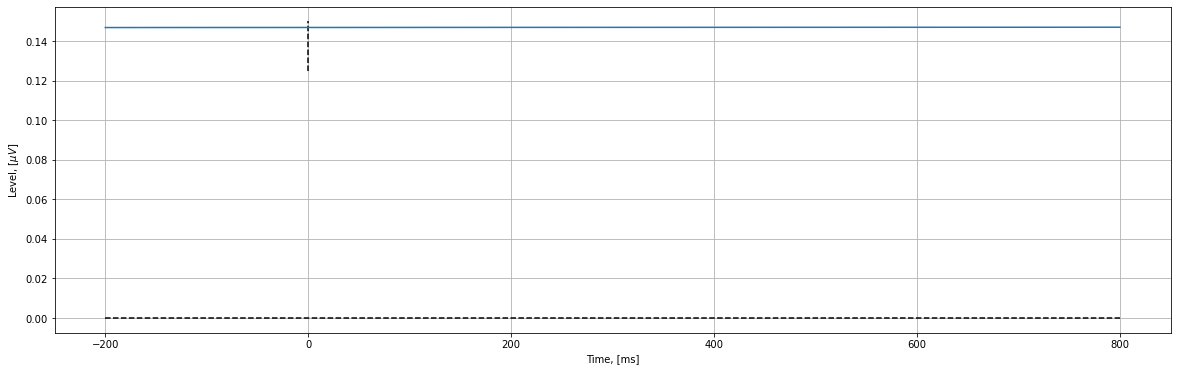

In [37]:
plt.figure(figsize=(20, 6))
plt.plot(EEG01_raw['Time'], EEG01_raw['Level']/100000)
plt.hlines(0, -200, 800, colors='black', linestyles='dashed')
plt.vlines(0, 0.125, 0.150, colors='black', linestyles='dashed')
plt.grid()
plt.xlabel('Time, [ms]')
plt.ylabel('Level, [$\mu V$]')
plt.show()